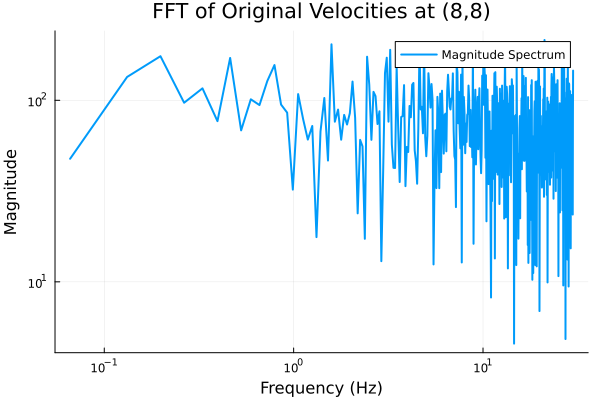

In [5]:
using FFTW, Plots, DelimitedFiles

# 入力パラメータの設定
folder_path = raw"D:\20250226_解析データ\5.0Hz_6.4Lmin_C001H001S0005"  # 処理するフォルダのパスを指定
interval_sec = 1/60  # テキストデータ間隔（秒）

# 指定フォルダ内のテキストファイルを取得
files = filter(x -> endswith(x, ".txt"), readdir(folder_path, join=true))
sort!(files)

timesteps = length(files)  # タイムステップ数
fs = 1 / interval_sec  # サンプリング周波数
freqs = fftfreq(timesteps, fs)

# データの格納用辞書
velocity_data = Dict()

# 各ファイルを読み込み、座標 (8,8) の速度データを取得
for file in files
    data = readdlm(file)
    for row in eachrow(data)
        x, y, vx, vy, speed = row[1:5]
        if (x, y) == (8.0, 8.0)
            if !haskey(velocity_data, (x, y))
                velocity_data[(x, y)] = Float64[]
            end
            push!(velocity_data[(x, y)], speed)
        end
    end
end

# FFTの計算
if haskey(velocity_data, (8.0, 8.0))
    vels = velocity_data[(8.0, 8.0)]
    fft_data = fft(vels)
    mag_spectrum = abs.(fft_data)

    # 両対数グラフのプロット
    plot(freqs[2:div(timesteps, 2)], mag_spectrum[2:div(timesteps, 2)],
         xlabel="Frequency (Hz)", ylabel="Magnitude", title="FFT of Original Velocities at (8,8)",
         label="Magnitude Spectrum", linewidth=2, xscale=:log10, yscale=:log10)
else
    println("No velocity data found for coordinate (8,8)")
end


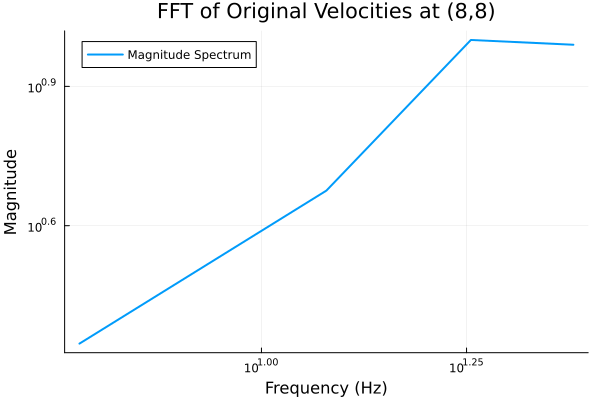

In [6]:
using FFTW, Plots, DelimitedFiles

# 入力パラメータの設定
folder_path = raw"C:\Users\sigot\OneDrive\デスクトップ\新しいフォルダー (2)"  # 処理するフォルダのパスを指定
interval_sec = 1/60  # テキストデータ間隔（秒）

# 指定フォルダ内のテキストファイルを取得
files = filter(x -> endswith(x, ".txt"), readdir(folder_path, join=true))
sort!(files)

timesteps = length(files)  # タイムステップ数
fs = 1 / interval_sec  # サンプリング周波数
freqs = fftfreq(timesteps, fs)

# データの格納用辞書
velocity_data = Dict()

# 各ファイルを読み込み、座標 (8,8) の速度データを取得
for file in files
    data = readdlm(file)
    for row in eachrow(data)
        x, y, vx, vy, speed = row[1:5]
        if (x, y) == (8.0, 8.0)
            if !haskey(velocity_data, (x, y))
                velocity_data[(x, y)] = Float64[]
            end
            push!(velocity_data[(x, y)], speed)
        end
    end
end

# FFTの計算
if haskey(velocity_data, (8.0, 8.0))
    vels = velocity_data[(8.0, 8.0)]
    fft_data = fft(vels)
    mag_spectrum = abs.(fft_data)

    # 両対数グラフのプロット
    plot(freqs[2:div(timesteps, 2)], mag_spectrum[2:div(timesteps, 2)],
         xlabel="Frequency (Hz)", ylabel="Magnitude", title="FFT of Original Velocities at (8,8)",
         label="Magnitude Spectrum", linewidth=2, xscale=:log10, yscale=:log10)
else
    println("No velocity data found for coordinate (8,8)")
end
